<a href="https://colab.research.google.com/github/yawsonsamuel320/deep_breath/blob/master/DeepBreath_(VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root_path = "/content/drive/MyDrive/ct-dataset"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import os
import shutil
import glob

In [ ]:
import keras

from keras.models import Sequential
from keras.preprocessing import image

from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

import tensorflow as tf

In [ ]:
train_path = root_path + "/content/drive/MyDrive/ct-dataset/Train"
val_path = root_path + "/content/drive/MyDrive/ct-dataset/val"

In [ ]:
train_batches = image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=train_path, target_size=(255, 255), classes=["Covid", "Normal"], batch_size=16)

val_batches = image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=val_path, target_size=(255, 255), classes=["Covid", "Normal"], batch_size=16)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
number_of_normal = train_batches.classes.sum()

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(2, 8, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')

  plt.tight_layout()
  plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

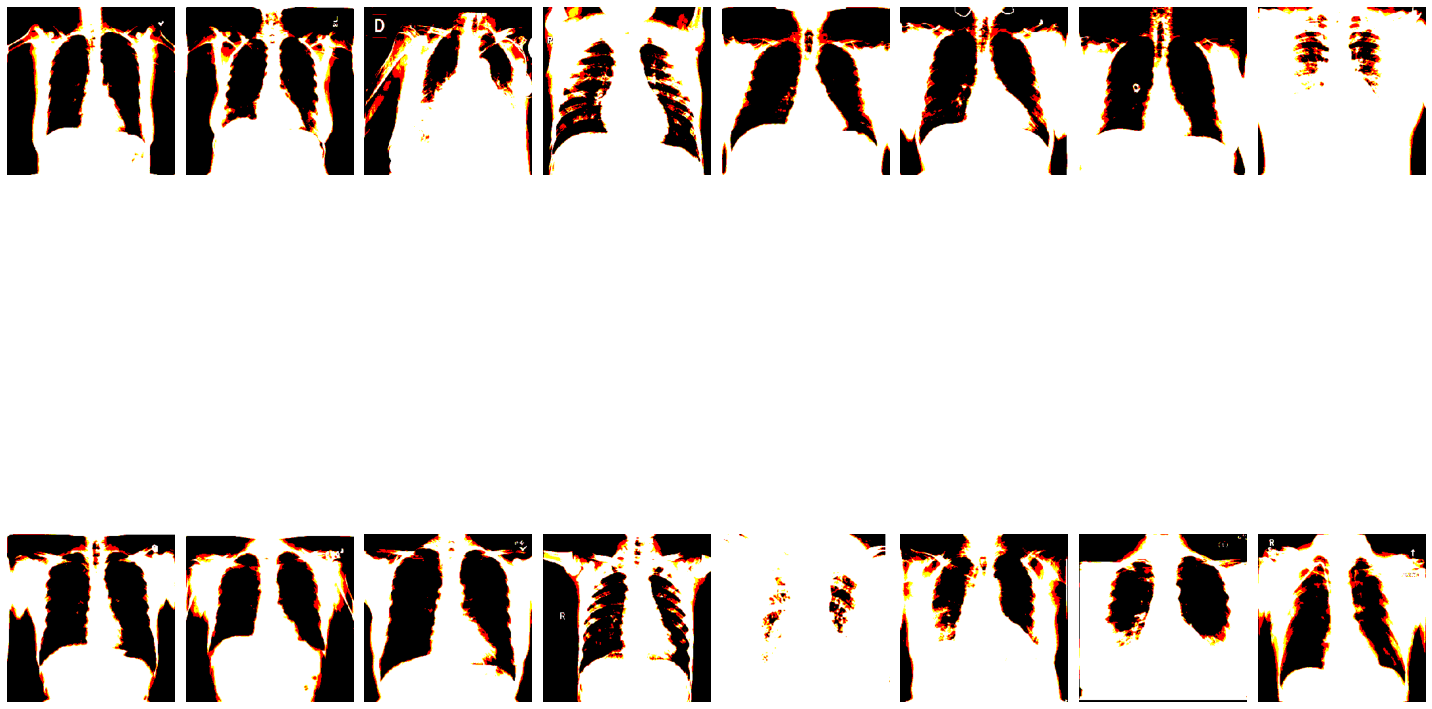

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
imgs, labels = next(train_batches)

plotImages(imgs)
print(labels)

#**APPROACH 1: VGG 16 TRANSFER LEARNING**

>[APPROACH 1: VGG 16 TRANSFER LEARNING](#scrollTo=BgQRwyT-6IKv)

>[Predict using fine-tuned VGG 16 model](#scrollTo=Qb2rwtM-j0_u)

>[APPROCH 2: CODING BLOCKS APPROACH](#scrollTo=drxiZuCvDAUw)

>[Approach 2](#scrollTo=sIDA2scrDiI6)

>>[OTHER APPROACH](#scrollTo=xLwikvv-qEGl)



In [ ]:
val_batches.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 5s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
type(vgg16_model)

keras.engine.functional.Functional

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
for layer in model.layers:
  layer.trainable = True

In [ ]:
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

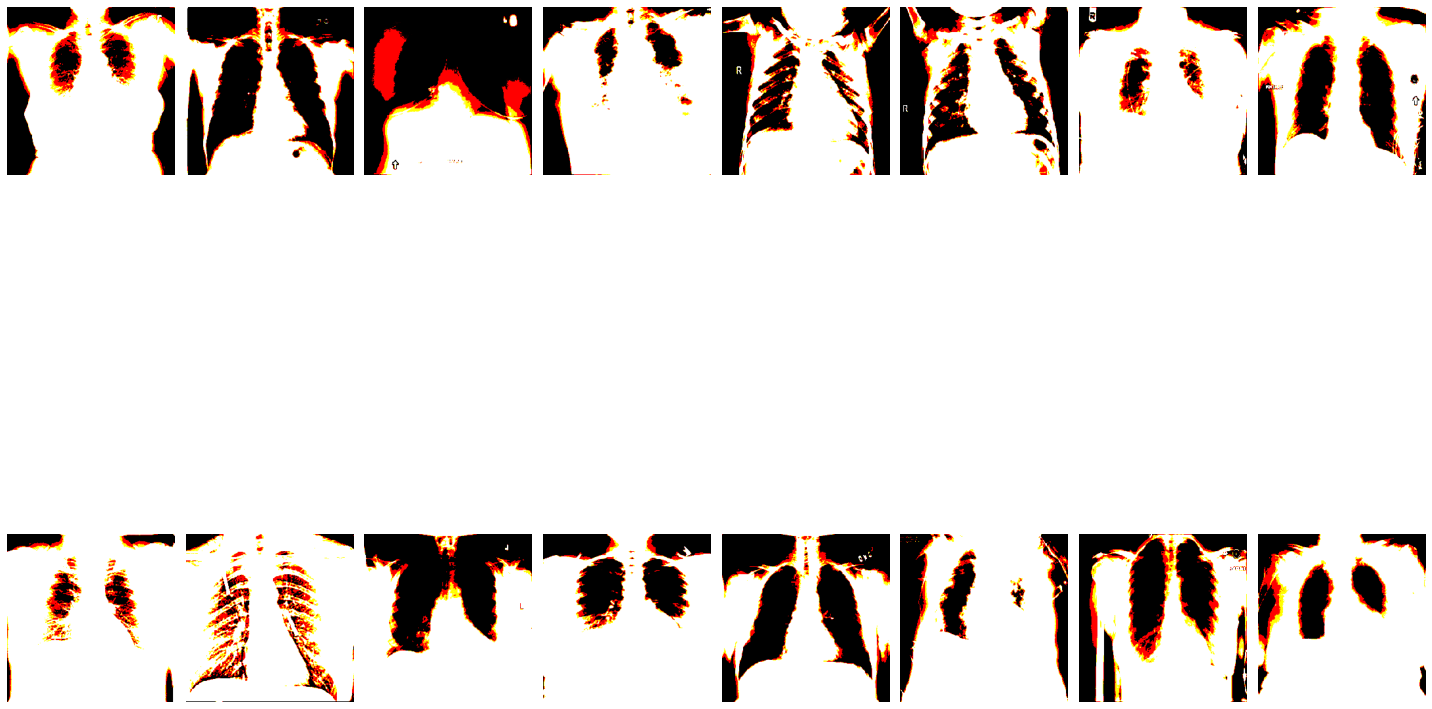

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [ ]:
test_imgs, test_labels = next(val_batches)
plotImages(test_imgs)
print(test_labels) 

In [ ]:
from tensorflow.keras.optimizers import Adam 

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/datasets/CovidDataset'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
import tensorflow as tf
from keras.metrics import *

In [ ]:
Precision

keras.metrics.Precision

In [ ]:

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=['accuracy',
             AUC(),
             Precision(),
             Recall(), 
             TruePositives(), 
             FalseNegatives(), 
             TrueNegatives(), 
             FalsePositives()])

In [ ]:
model.load_weights(root_path+"/x_ray_weights.h5")

In [ ]:
model.fit(x=train_batches, validation_data=val_batches, epochs=5, verbose=1, callbacks=[model_checkpoint_callback])                                                        

Epoch 1/5
605/605 [==============================] - 2776s 5s/step - loss: 0.1392 - accuracy: 0.9517 - auc: 0.9882 - precision: 0.9517 - recall: 0.9517 - true_positives: 9210.0000 - false_negatives: 467.0000 - true_negatives: 9210.0000 - false_positives: 467.0000 - val_loss: 0.0996 - val_accuracy: 0.9670 - val_auc: 0.9932 - val_precision: 0.9670 - val_recall: 0.9670 - val_true_positives: 2670.0000 - val_false_negatives: 91.0000 - val_true_negatives: 2670.0000 - val_false_positives: 91.0000
Epoch 2/5
605/605 [==============================] - 424s 700ms/step - loss: 0.0814 - accuracy: 0.9732 - auc: 0.9946 - precision: 0.9732 - recall: 0.9732 - true_positives: 9418.0000 - false_negatives: 259.0000 - true_negatives: 9418.0000 - false_positives: 259.0000 - val_loss: 0.1054 - val_accuracy: 0.9736 - val_auc: 0.9903 - val_precision: 0.9736 - val_recall: 0.9736 - val_true_positives: 2688.0000 - val_false_negatives: 73.0000 - val_true_negatives: 2688.0000 - val_false_positives: 73.0000
Epoch 3/

In [ ]:
model.save_weights(root_path+"/x_ray_weights.h5")

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('x_ray_weights_1.h5')

#**Predict using fine-tuned VGG 16 model**

In [ ]:
test_path = "/content/drive/MyDrive/datasets/CovidDataset/test"

test_batches = image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=test_path, target_size=(255, 255), classes=["Covid", "Normal"], batch_size=16)


In [ ]:
predictions = model.predict(x=test_batches, verbose=1)

In [ ]:
val_batches.classes

In [ ]:
predictions

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ["Covid", "Normal"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion")

In [ ]:
cm_plot_labels = ["Covid", "Normal"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion", normalize=True)